Credit:
https://towardsdatascience.com/image-processing-with-python-unsupervised-learning-for-image-segmentation-90ebd23d91a4
https://datacarpentry.org/image-processing/05-creating-histograms/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans

In [47]:
# run this for analysis on normal image
filepath='../assetstore/mk-tiff/closeup-1.tiff'

In [28]:
# run this for analysis on preprocessed (edge-detected) image
filepath='../assetstore/mk-tiff/closeup-1-edgedetect.tiff'

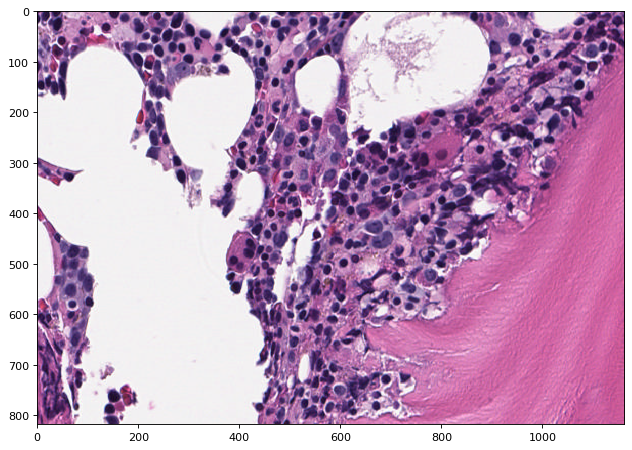

In [45]:
# show original image
tiff = imread(filepath)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(tiff)

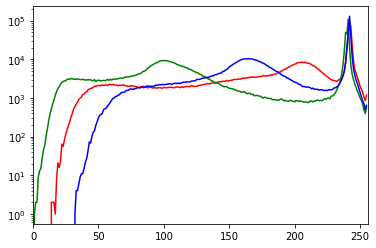

In [48]:
# show distribution of colors in the image to determine number of clusters for model
colors = ("red","green","blue")
channel_ids = (0,1,2)
plt.figure()
plt.xlim([0, 256])
plt.yscale('log')
for channel_id, color in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(tiff[:,:,channel_id], bins=256, range=(0,256))
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.show()

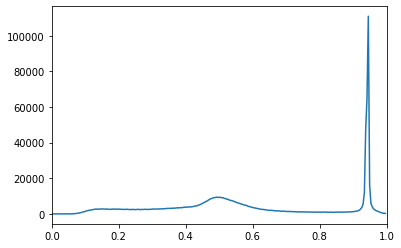

In [49]:
# show distribution of grayscale values for grayscale image
graytiff = imread(filepath, as_gray=True)
plt.figure()
plt.xlim([0.0, 1.0])
histogram, bin_edges = np.histogram(graytiff, bins=256, range=(0,1))
plt.plot(bin_edges[0:-1], histogram)
#plt.yscale('log')
plt.show()

In [50]:
# convert image to dataframe to feed model
# this takes a disturbingly long time
def img_to_pd(img):
    df = pd.DataFrame([img[:,:,0].flatten(),
                       img[:,:,1].flatten(),
                       img[:,:,2].flatten()]).T
    df.columns = ['R', 'G', 'B']
    return df

df_tiff = img_to_pd(tiff)
df_tiff.head(5)

,R,G,B
0,60,37,99
1,62,37,98
2,62,36,95
3,80,46,104
4,117,67,120


/home/charlie/.local/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


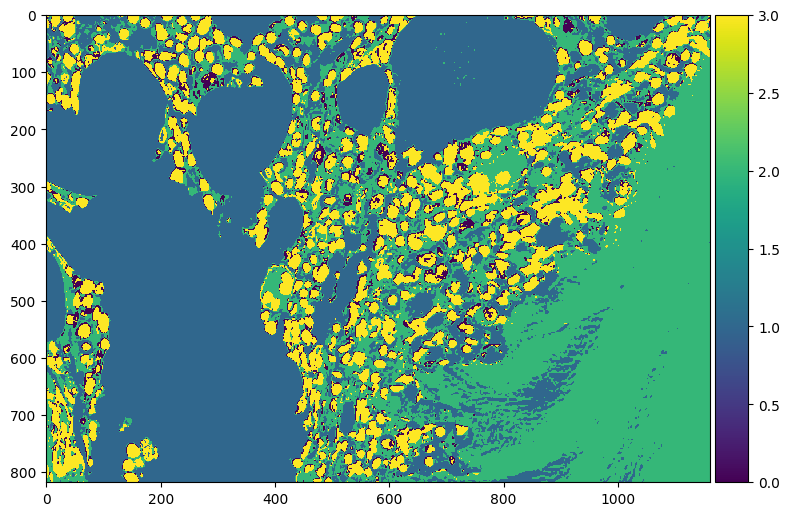

In [55]:
# use k-means to cluster image into n_clusters distinct clusters
plt.figure(num=None, figsize=(8, 6), dpi=100)
kmeans = KMeans(n_clusters = 4, random_state = 42).fit(df_tiff)
result = kmeans.labels_.reshape(tiff.shape[0], tiff.shape[1])
imshow(result, cmap='viridis')
plt.show()

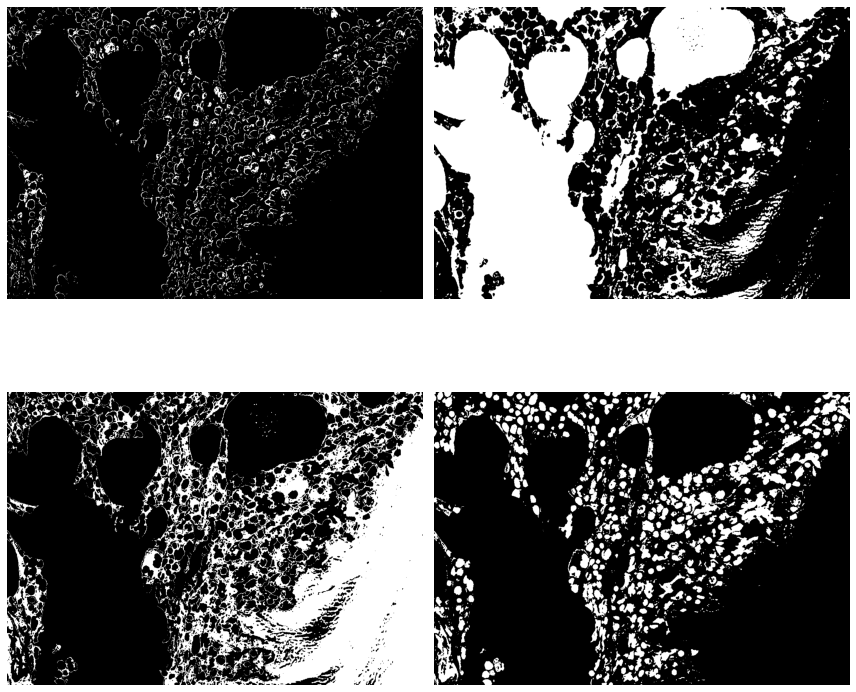

In [56]:
# show all clusters as individual masks
# change (2, 2 for number of rows/cols to show masks
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for n, ax in enumerate(axes.flatten()):
    ax.imshow(result==[n], cmap='gray')
    ax.set_axis_off()

fig.tight_layout()

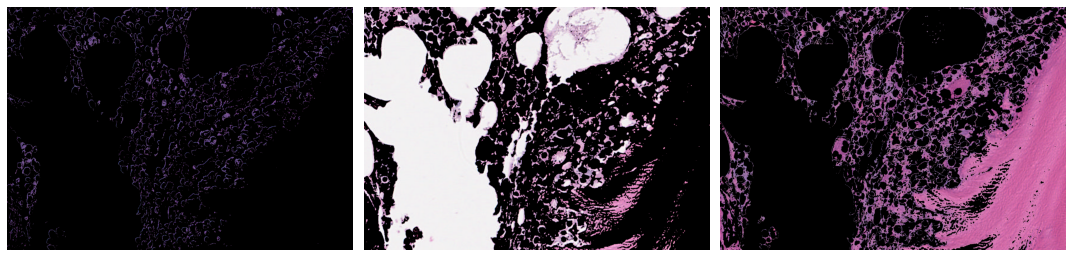

In [57]:
# shows how the algorithm clusters by rgb value by layering masks on original image
fig, axes = plt.subplots(1, 3, figsize=(15, 12))
for n, ax in enumerate(axes.flatten()):
    tiff = imread(filepath)
    tiff[:,:,0] = tiff[:,:,0] * (result==[n])
    tiff[:,:,1] = tiff[:,:,1] * (result==[n])
    tiff[:,:,2] = tiff[:,:,2] * (result==[n])
    ax.imshow(tiff)
    ax.set_axis_off()
fig.tight_layout()